Реалізувати програмно один із звукових ефектів (за вибором):
- «Тремоло».

In [77]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wave

In [78]:
def visual_notes(notes_concatenated, rate, duration, length=500):
    note_length = rate * duration
    notes_count = len(notes_concatenated) // (note_length)
    notes_part = []
    for i in range(notes_count):
        notes_part.append(notes_concatenated[i*note_length:i*note_length+length])
    
    plt.figure(figsize=(30, 10))
    plt.plot(np.concatenate(notes_part))
    plt.show()

In [79]:
RATE = 44100
DURATION = 2
AMPLITUDE = 100
n = np.array([-9, -7, -5, -4, -2, 0, 2])
frequencies = 440 * np.power(2 ** (1/12), n)
frequencies

array([261.6255653 , 293.66476792, 329.62755691, 349.22823143,
       391.99543598, 440.        , 493.88330126])

In [80]:
notes = []
for freq in frequencies:
    note = np.sin(2 * np.pi * freq * np.linspace(0, DURATION, DURATION * RATE))
    notes.append(note)
sound = AMPLITUDE * np.concatenate(notes)
wave.write('test.wav', RATE, sound)

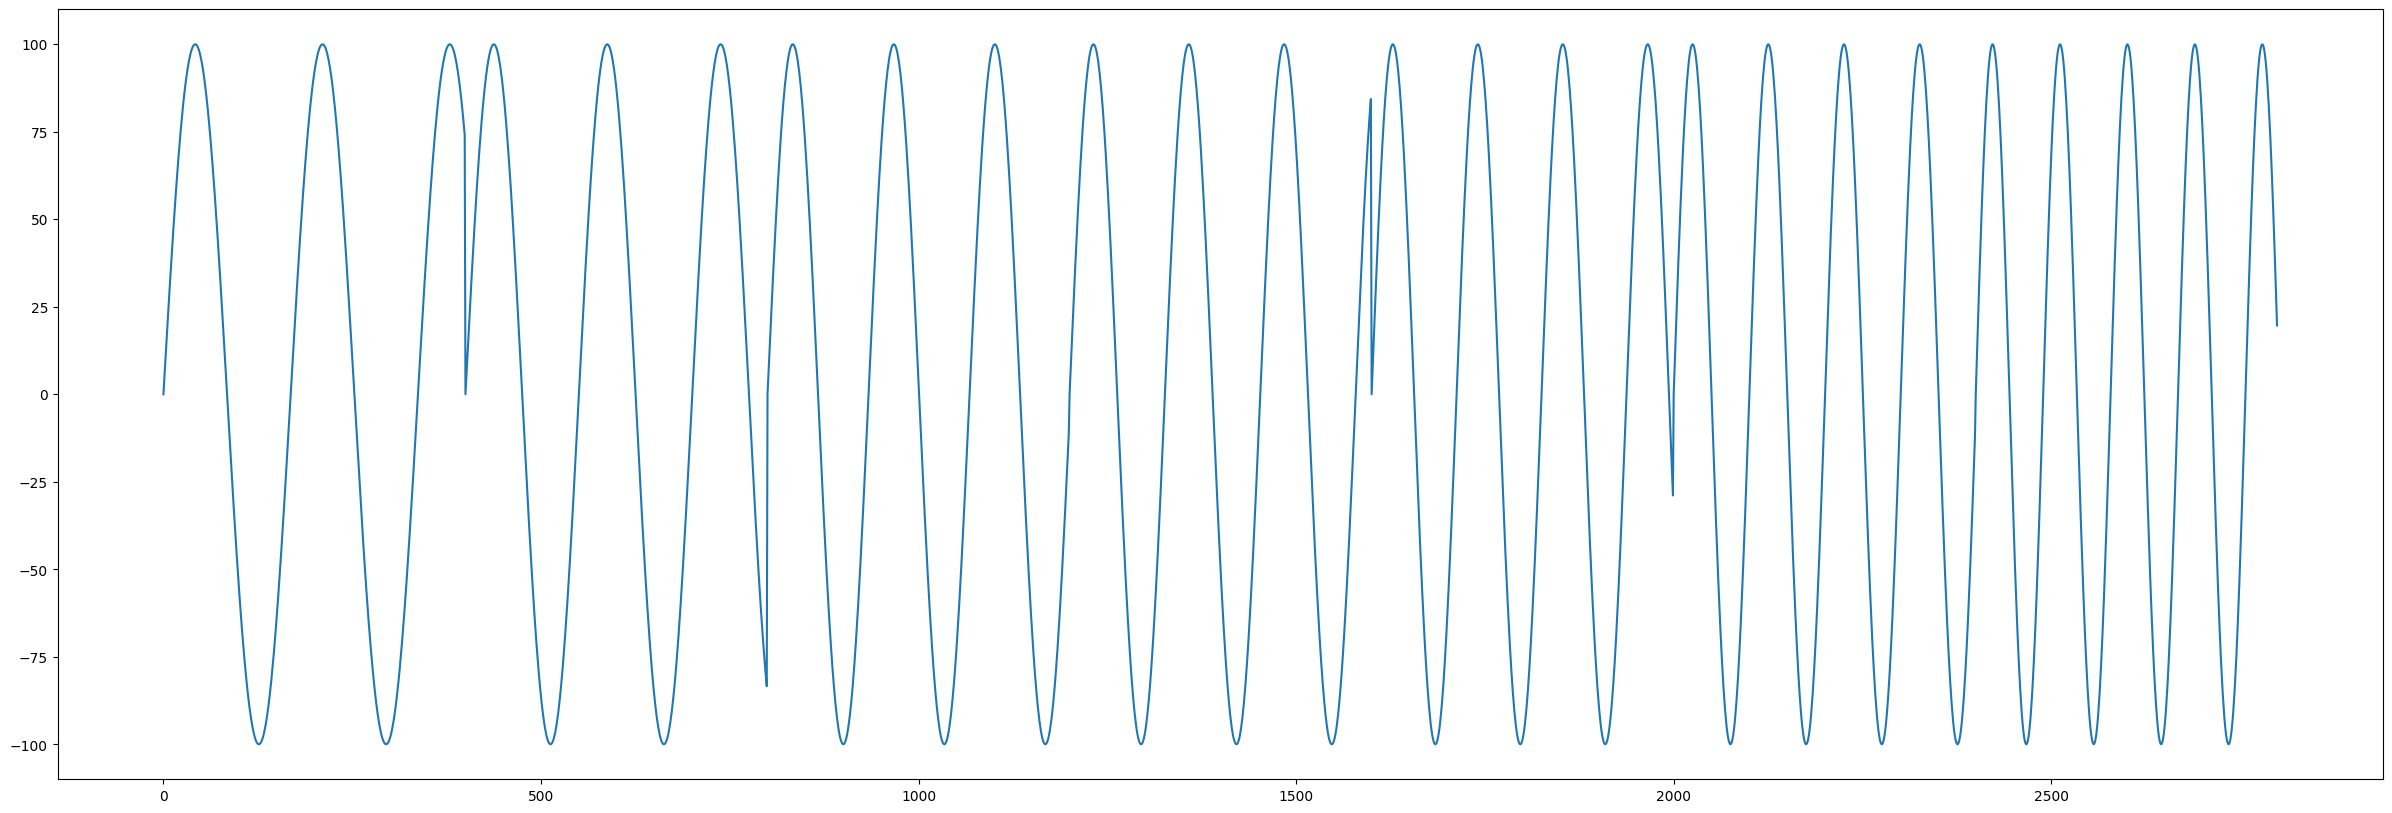

In [81]:
visual_notes(sound, RATE, DURATION, length=400)

In [82]:
def apply_tremolo(sound, rate, D=0.35, Fr=7):
    duration = len(sound) // rate
    t = np.linspace(0, duration, duration * rate)
    e = 1 + D * np.sin(2 * np.pi * Fr * t)
    return e * sound

In [83]:
#  Typical values:
#    rate Fr - from 3 to 10 Hz
#    depth D - from 0.23 to 0.435  -  20*log10((1+D)/(1-D)) Є 4 to 8 dB 
modified_sound = apply_tremolo(sound, RATE, D=0.25, Fr=7)

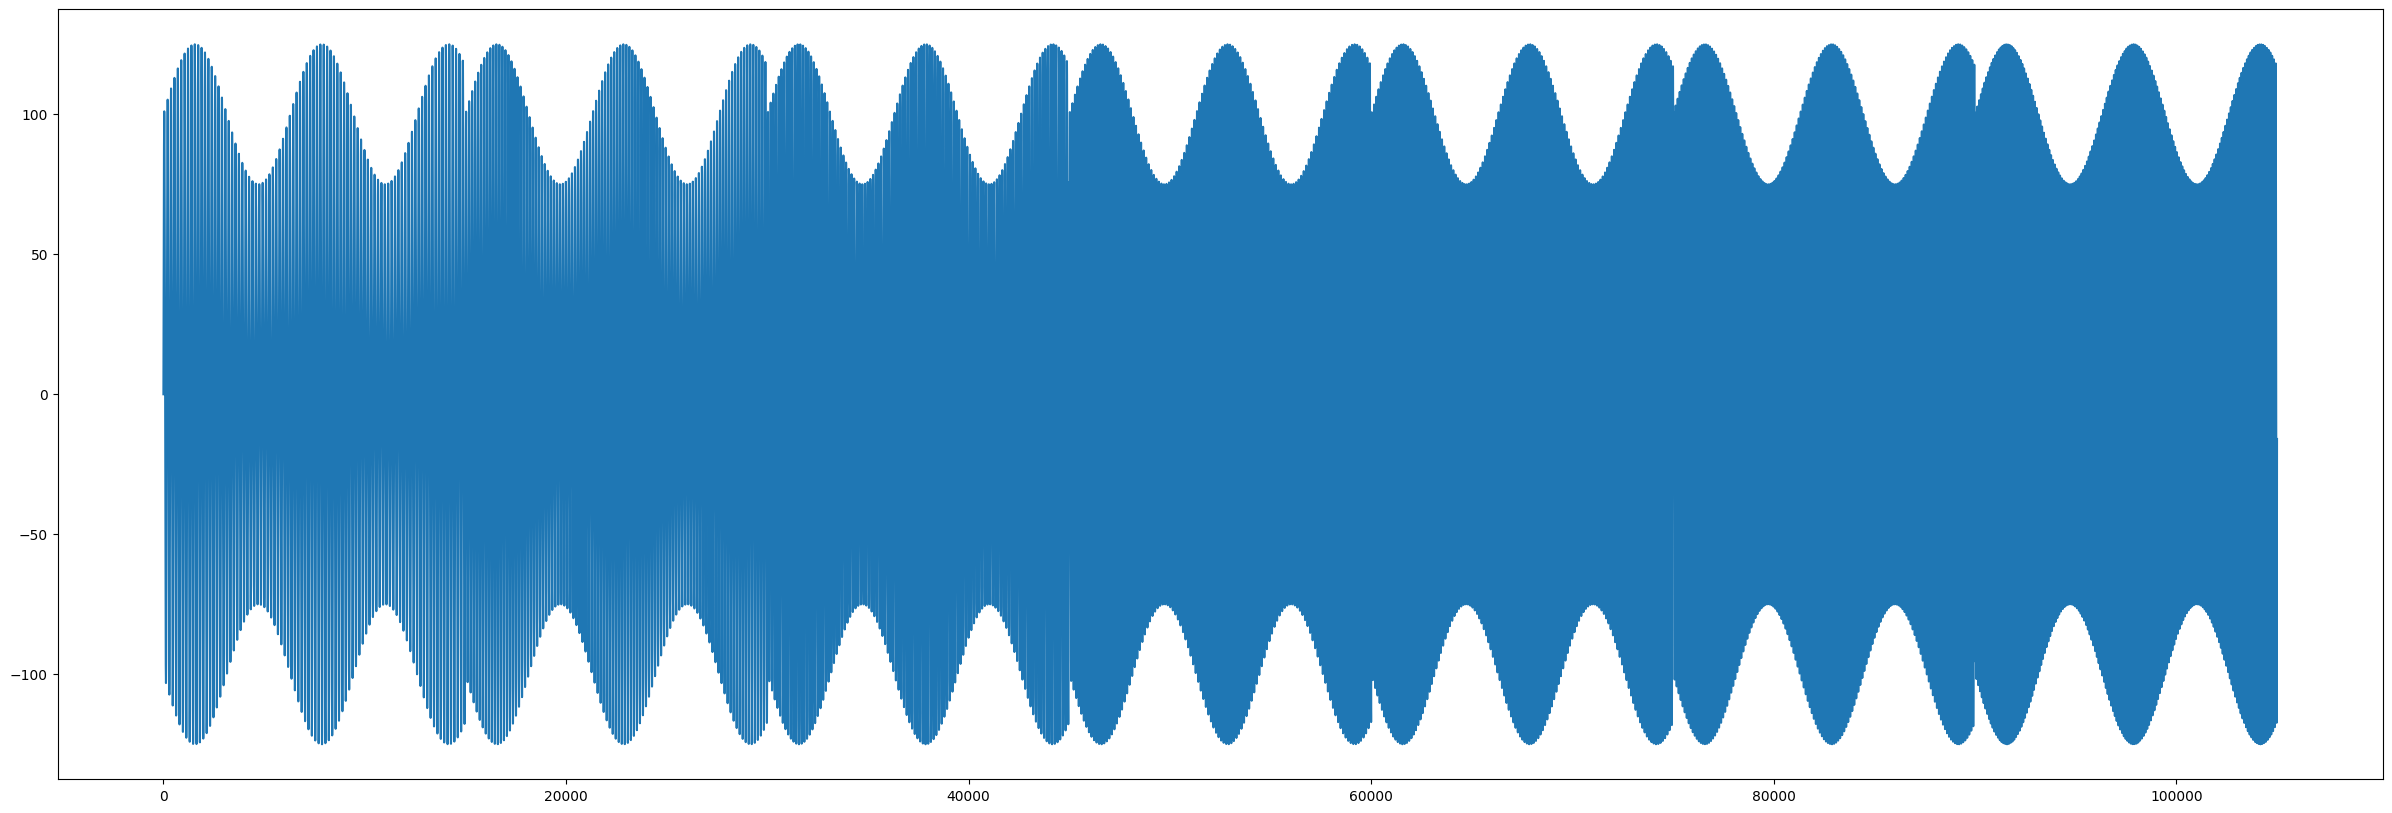

In [86]:
visual_notes(modified_sound, RATE, DURATION, length=15000)

In [85]:
wave.write('tremolo.wav', RATE, modified_sound)